In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy import stats
import explore as exp
import acquire as acq
import prepare as prep

In [2]:
df = pd.read_csv('output.csv')

In [3]:
def split_data(df):
    '''Split into train, validate, test with a 60/20/20 ratio'''
    train_validate, test = train_test_split(df, test_size=.2, random_state=42)
    train, validate = train_test_split(train_validate, test_size=.25, random_state=42)
    return train, validate, test

In [4]:
train, validate, test = split_data(df)

plt.figure(figsize=(8, 6))
sns.heatmap(train, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [5]:
obj_cols = exp.get_object_cols(df)

In [6]:
num_cols = exp.get_numeric_cols(df)

SUMMARY REPORT
          
          
Dataframe head: 
        severity           start_time             end_time  distance  \
668178         2  2021-12-13 18:02:00  2021-12-13 19:19:53     0.405   
502734         2  2019-12-27 22:10:00  2019-12-27 23:22:27     0.000   
14202          2  2021-12-31 15:21:52  2021-12-31 15:50:57     0.000   

          street       city     county state zipcode country  ...  \
668178  CA-163 S  San Diego  San Diego    CA   92108      US  ...   
502734   CA-57 S       Brea     Orange    CA   92821      US  ...   
14202    Lunt Rd   Oroville      Butte    CA   95965      US  ...   

        traffic_signal  turning_loop  sunrise_sunset  start_date  start_time_  \
668178               0             0             0.0  2021-12-13     18:02:00   
502734               0             0             0.0  2019-12-27     22:10:00   
14202                0             0             1.0  2021-12-31     15:21:52   

          end_date  day_of_week  month    len_of_affect

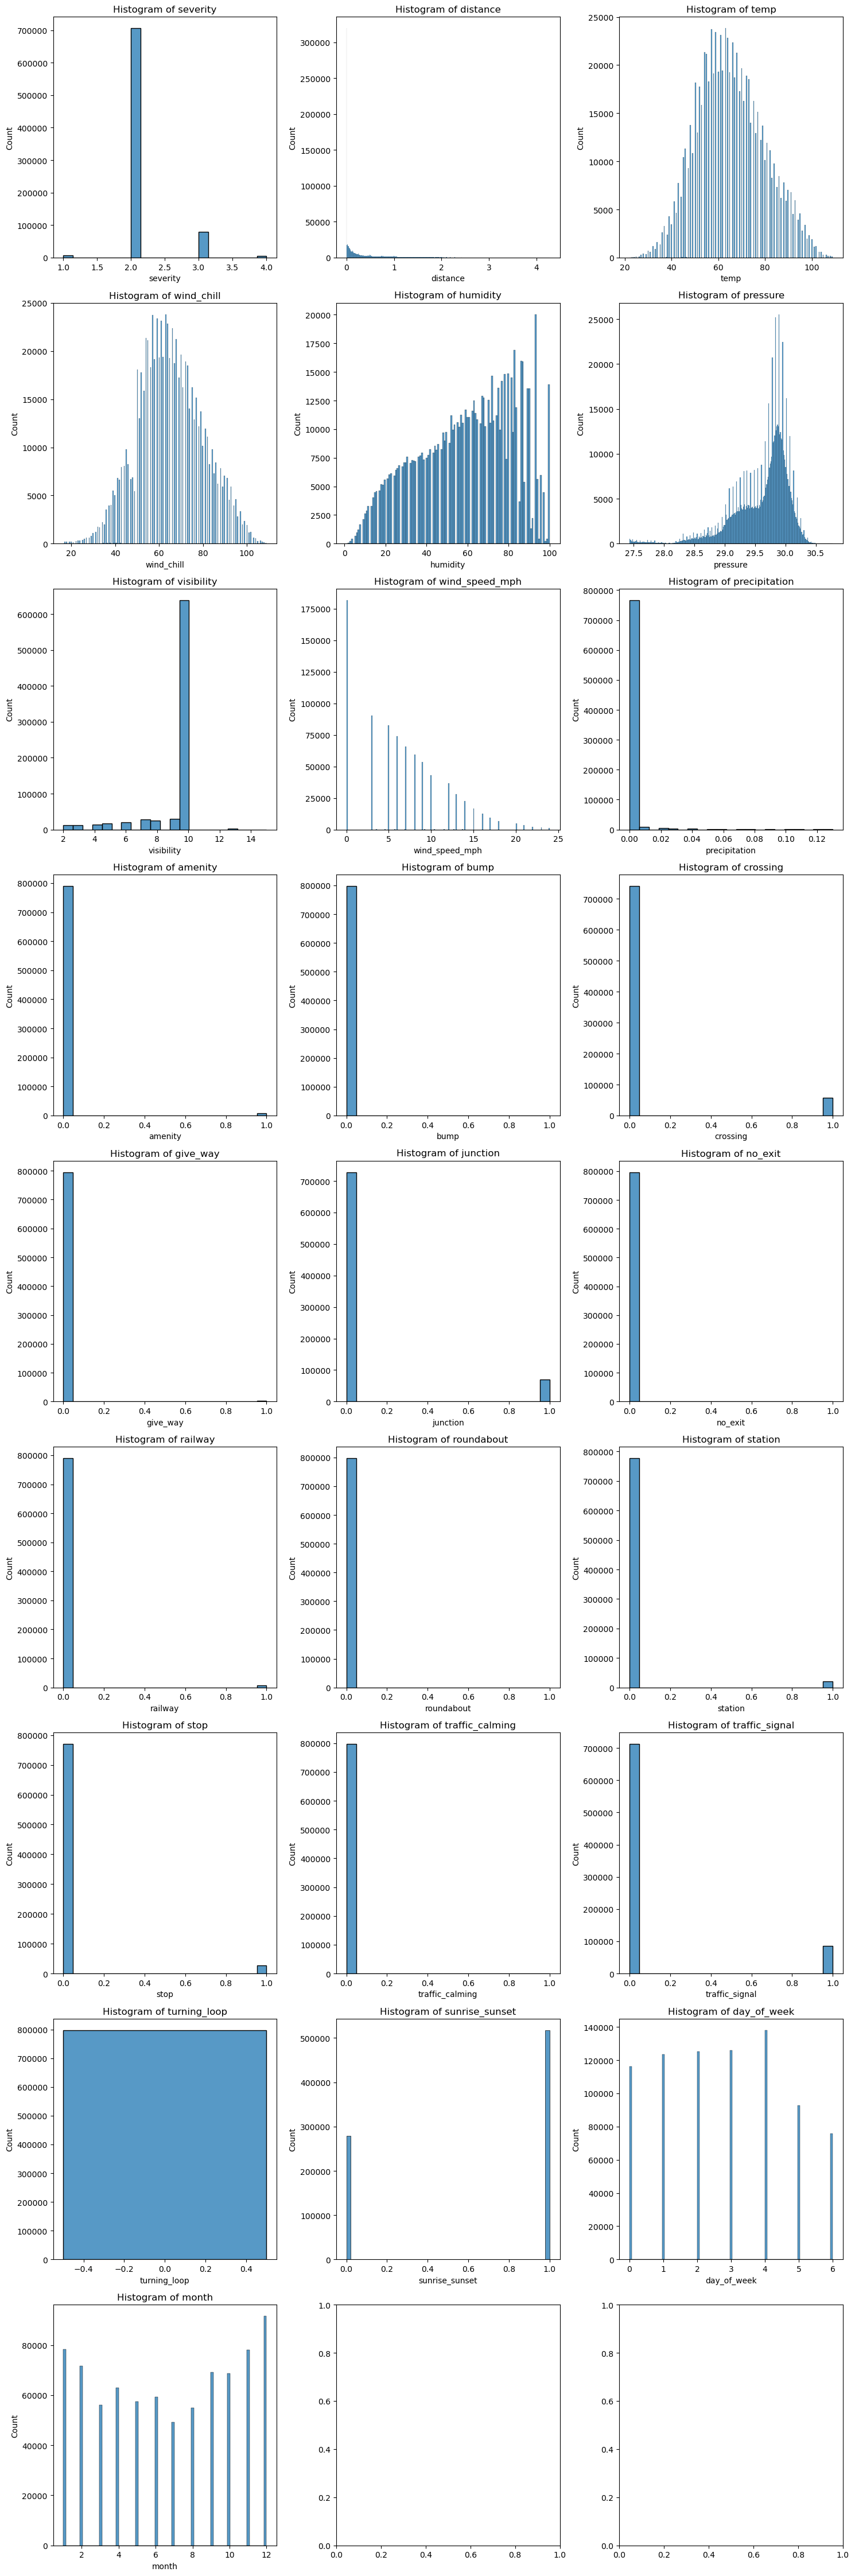

In [7]:
exp.summarize(train)

In [8]:
df = prep.prep_output(df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329374 entries, 0 to 1329373
Data columns (total 25 columns):
 #   Column             Non-Null Count    Dtype          
---  ------             --------------    -----          
 0   severity           1329374 non-null  int64          
 1   distance           1329374 non-null  float64        
 2   city               1329374 non-null  object         
 3   county             1329374 non-null  object         
 4   state              1329374 non-null  object         
 5   zipcode            1329374 non-null  object         
 6   country            1329374 non-null  object         
 7   temp               1329374 non-null  float64        
 8   wind_chill         1329374 non-null  float64        
 9   humidity           1329374 non-null  float64        
 10  pressure           1329374 non-null  float64        
 11  visibility         1329374 non-null  float64        
 12  wind_direction     1329366 non-null  object         
 13  wind_speed_m

In [15]:
df.shape

(1329374, 25)

In [10]:
def split_data(df_o):
    '''Split into train, validate, test with a 60/20/20 ratio'''
    train_validate, test = train_test_split(df, test_size=.2, random_state=42)
    train, validate = train_test_split(train_validate, test_size=.25, random_state=42)
    return train, validate, test

In [11]:
train, validate, test = split_data(df)

In [12]:
df.columns

Index(['severity', 'distance', 'city', 'county', 'state', 'zipcode', 'country',
       'temp', 'wind_chill', 'humidity', 'pressure', 'visibility',
       'wind_direction', 'wind_speed_mph', 'precipitation',
       'weather_condition', 'junction', 'turning_loop', 'sunrise_sunset',
       'start_time_', 'day_of_week', 'month', 'len_of_affect', 'season',
       'duration'],
      dtype='object')

SUMMARY REPORT
          
          
Dataframe head: 
        severity  distance       city     county state zipcode country  temp  \
668178         2     0.405  San Diego  San Diego    CA   92108      US  57.0   
502734         2     0.000       Brea     Orange    CA   92821      US  50.0   
14202          2     0.000   Oroville      Butte    CA   95965      US  54.0   

        wind_chill  humidity  ...  weather_condition  junction turning_loop  \
668178        57.0      72.0  ...             Cloudy         0            0   
502734        50.0      74.0  ...             Cloudy         1            0   
14202         54.0      47.0  ...               Fair         0            0   

        sunrise_sunset  start_time_ day_of_week  month    len_of_affect  \
668178             0.0     18:02:00           0     12  0 days 01:17:53   
502734             0.0     22:10:00           4     12  0 days 01:12:27   
14202              1.0     15:21:52           4     12  0 days 00:29:05   

       

MemoryError: Unable to allocate 2.02 PiB for an array with shape (284340000000002,) and data type float64

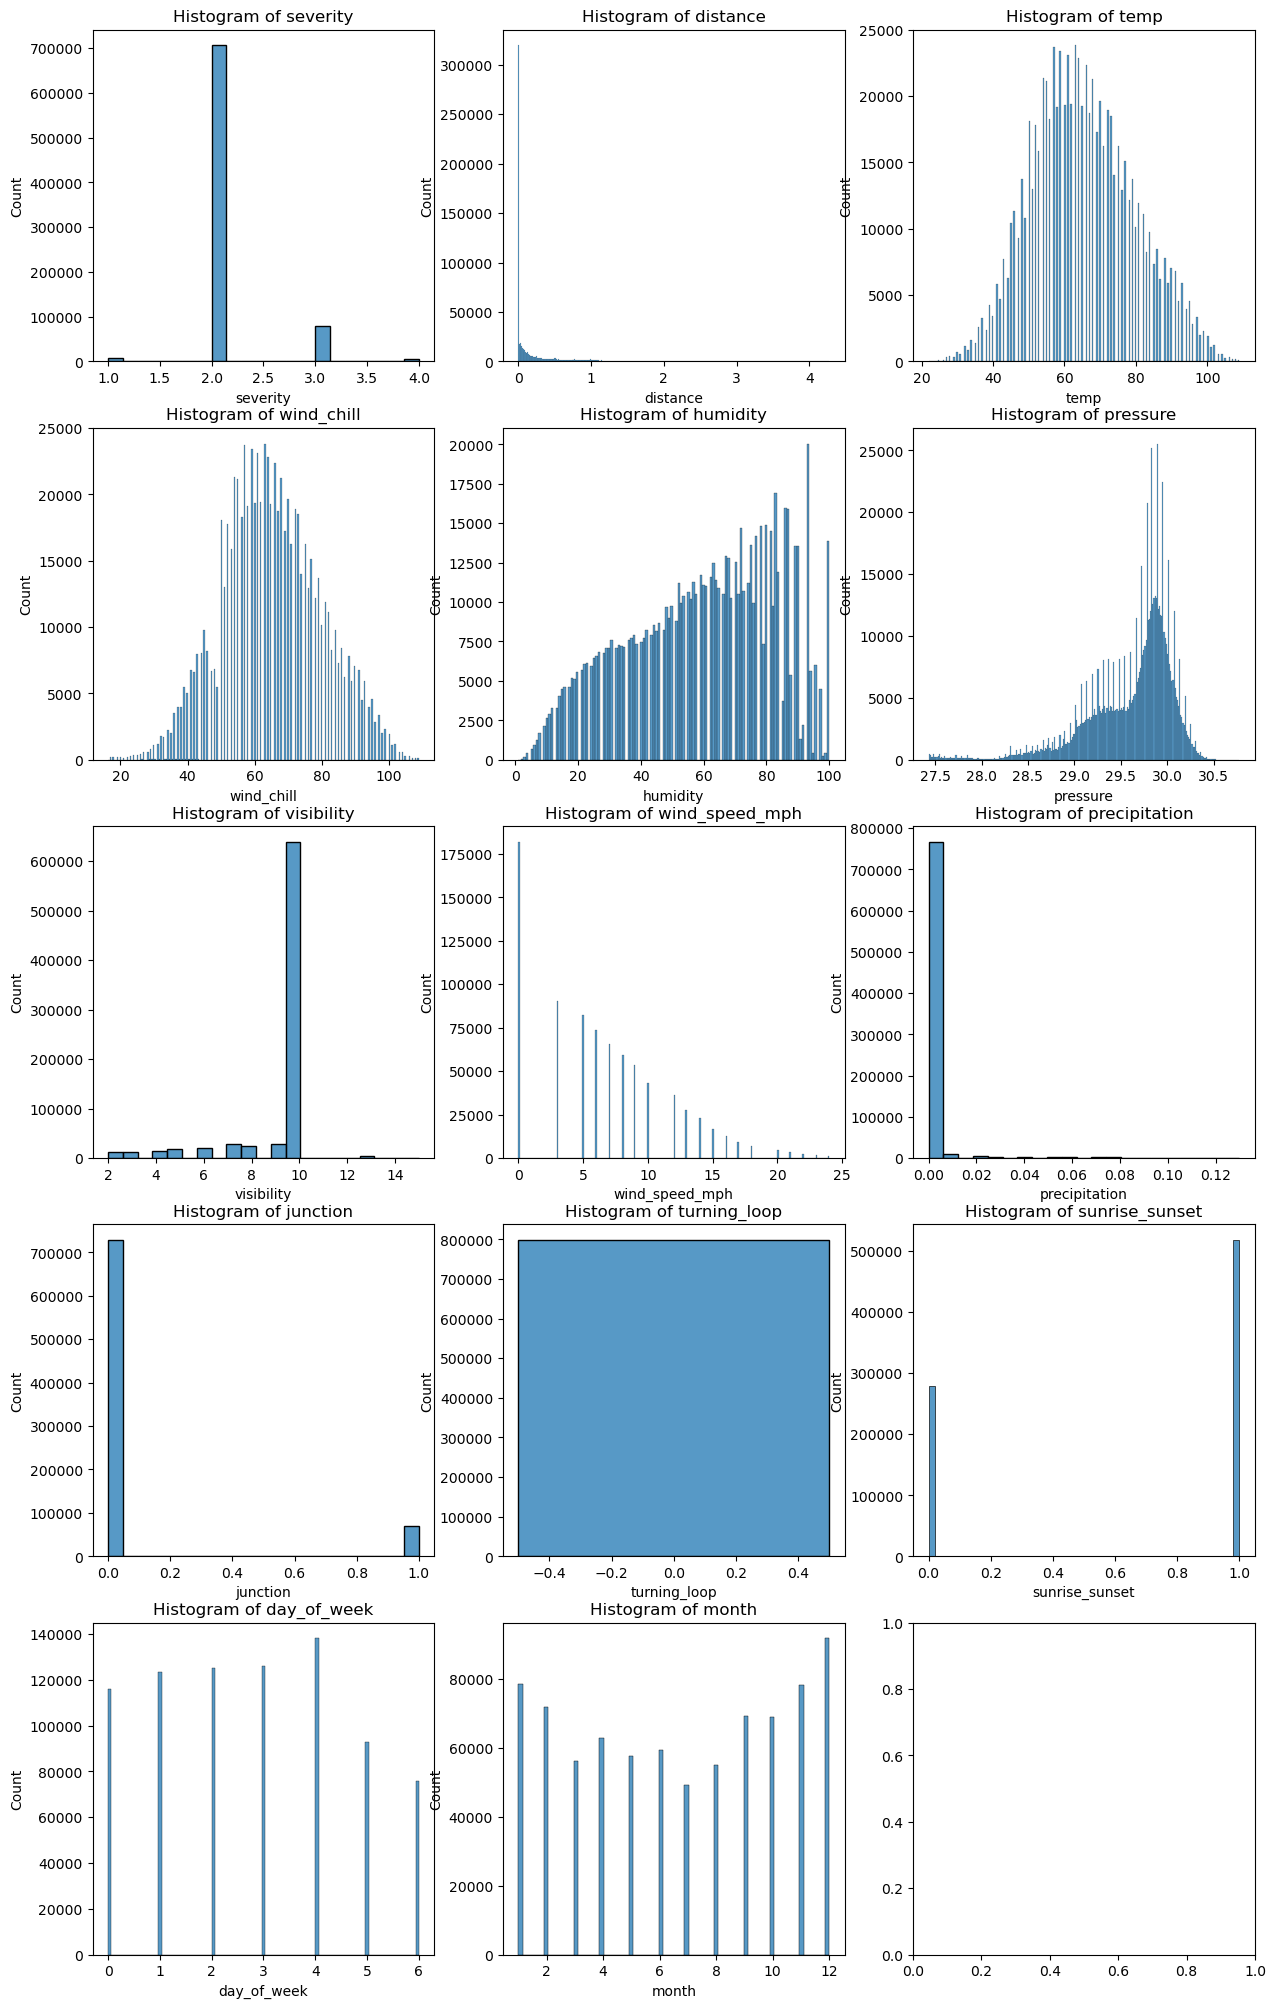

In [13]:
exp.summarize(train)

In [14]:
train.shape

(797624, 25)

In [ ]:
train.head(1)

In [ ]:
grouped_data = train.groupby(['state', 'severity']).size().unstack()

grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))
sns.set_palette('viridis')
grouped_data.plot(kind='bar')
plt.title('Severity Distribution by State')
plt.xlabel('State')
plt.ylabel('Proportion')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

In [ ]:
grouped_data = train.groupby(['day_of_week', 'severity']).size().unstack()

grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))
sns.set_palette('viridis')
grouped_data.plot(kind='bar')
plt.title('Severity Distribution by State')
plt.xlabel('State')
plt.ylabel('Proportion')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

selected_columns = ['severity', 'distance', 'county', 'state', 'zipcode', 'country',
       'temp', 'wind_chill', 'humidity', 'pressure', 'visibility',
       'wind_direction', 'wind_speed_mph', 'precipitation',
       'weather_condition', 'junction', 'turning_loop', 'sunrise_sunset',
       'start_time_', 'day_of_week', 'month', 'len_of_affect', 'season',
       'duration']

# Subset the DataFrame with selected columns
data_subset = train[selected_columns]

In [ ]:
train.shape

In [ ]:
'''data_train = train['severity', 'distance', 'county', 'state', 'zipcode', 'country',
       'temp', 'wind_chill', 'humidity', 'pressure', 'visibility',
       'wind_direction', 'wind_speed_mph', 'precipitation',
       'weather_condition', 'junction', 'turning_loop', 'sunrise_sunset',
       'start_time_', 'day_of_week', 'month', 'len_of_affect', 'season',
       'duration']'''

if all(col in data_train.columns for col in selected_columns):
    # Subset the DataFrame with selected columns
    data_subset = data_train[selected_columns]

    # Calculate the correlation matrix for the selected columns
    correlation_matrix = data_subset.corr()

    # Create a heatmap of the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("One or more selected columns do not exist in the DataFrame.")

In [ ]:
correlation_matrix = data_subset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
sns.regplot(data=train,x='area',y='severity',marker='.',line_kws={'color':'orange'})
plt.show()



target = 'severity'
columns_to_plot = train.drop(columns=target).columns

# Loop over the columns and plot lmplot excluding string columns
for column in columns_to_plot:
    if train[column].dtype != 'object':  # Exclude string columns
        sns.lmplot(x=column, y=target, data=train, line_kws={'color': 'orange'})
        # plt.ylim(0, 2_000_000)
        plt.show()

sns.pairplot(data=train,kind='reg', corner=True, hue = 'state')
plt.show()

In [ ]:
import itertools
cols = train.columns.to_list()
def pear(train, x, y, alt_hyp='two-sided'):
    r,p = stats.spearmanr(train[x], train[y], alternative=alt_hyp)
    print(f"Spearman's R: {x} and {y}\n", f'r = {r}, p = {p}')
for col in itertools.permutations(cols,2):
    # cont & cont
    pear(train,col[0],col[1])